In [1]:
%matplotlib inline
%pylab inline
import numpy as np #linear algebra library
import pandas as pd # data manipulation library
import matplotlib.pyplot as plt #plotting library
from statsmodels.tsa import stattools #time series analysis module
import seaborn as sns # plotting library with more features
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df1 = pd.read_csv(r"C:\Users\Sony\Desktop\CMO_MSP_Mandi.csv")
df2 = pd.read_csv(r"C:\Users\Sony\Desktop\Monthly_data_cmo.csv",index_col=0, parse_dates = [[2,3]], infer_datetime_format = True)

In [3]:
df1.head() #Displaying head of data for MSP

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [4]:
#df1 = df1.set_index('year').to_period('A')

In [5]:
df2.head() #Displaying head of data for Monthly Mandi arrivals, prices ,etc.

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04-01,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04-01,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04-01,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [6]:
type(df2.index) # But ,we would rather like it to be a period index with frequency 'M', so converting next!

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
df2 = df2.to_period(freq='M') #Converting to period index with monthly frequency. I think PeriodIndex will be best,
# since we are looking at the whole month and not just the first day of the month
type(df2.index)

pandas.core.indexes.period.PeriodIndex

# Exploring the DataFrame df1 , for MSP

In [8]:
df1.shape # It contains 155 instances with 5 columns

(155, 5)

# Seeing below count of msprice is 145, so it contains 10 missing data points ; year,msp_filter, commodity and Type don't contain any missing data.¶


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
commodity     155 non-null object
year          155 non-null int64
Type          155 non-null object
msprice       145 non-null float64
msp_filter    155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.1+ KB


# Commodity has 32 unique values, Type has 3 unique values, for numeric data types i.e, np.number unique, top ,etc are not given¶


In [10]:
df1.describe(include = 'all')

,commodity,year,Type,msprice,msp_filter
count,155,155.000000,155,145.000000,155.0
unique,32,NaN,3,NaN,NaN
top,BAJRI,NaN,Kharif Crops,NaN,NaN
freq,5,NaN,90,NaN,NaN
mean,NaN,2014.000000,NaN,2822.448276,1.0
std,NaN,1.418798,NaN,1441.725928,0.0
min,NaN,2012.000000,NaN,170.000000,1.0
25%,NaN,2013.000000,NaN,1470.000000,1.0
50%,NaN,2014.000000,NaN,2970.000000,1.0
75%,NaN,2015.000000,NaN,4000.000000,1.0


# Below, we can see that msp_filter has only unique value of 1, thus, we can drop this column since it doesn't provide us any utility.

In [11]:
df1['msp_filter'].unique()

array([1], dtype=int64)

In [12]:
df1 = df1.drop('msp_filter', axis=1) #Dropping msp_filter

In [13]:
df1['year'].unique() # Five years are summarized in the dataset 2012, 2013, 2014, 2015 and 2016

array([2012, 2013, 2014, 2015, 2016], dtype=int64)

# Now, I'll try to summarize CMO_MSP_Mandi.csv dataset. It contains four columns:(after removing msp_filter)
1) commodity - Which contains 32 unique values, and gives different types of crops according to the seasons.
2) year : We have data for five years from 2012 to 2016.
3) Type : Whether the commodity is a Kharif crop, Rabi crop or other crop.
4) msp_price - Gives the minimum support price for a commodity, since we have yearly data for each crop, we have 5 data points of msp for each commodity/crop.

# For df1 my aim is to remove any outliers and then impute the 10 missing values in the data.

In [14]:
# Remove the pound symbol to get access to the code, this is boxplot of msprices
# %load C:\Users\Sony\msp_msp_plot.ipynb

In [15]:
# Histogram of msprices.
# %load C:\Users\Sony\msp_distplot.ipynb

# The boxplot below suggests that there are no outliers in "msprice" vs "type of crop"

In [16]:
# %load C:\Users\Sony\msp_croptype_boxplot.ipynb

# Bar plot

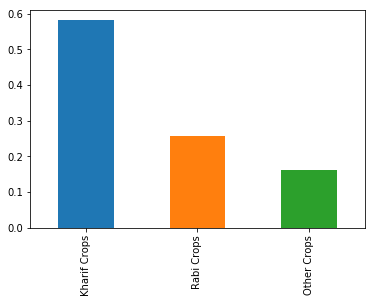

In [17]:
(df1['Type'].value_counts()/len(df1)).plot.bar() #More Kharif crops than Rabi crops?

# Histogram Plot

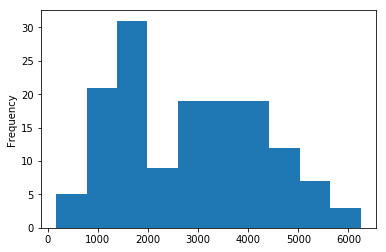

In [18]:
df1['msprice'].plot.hist()

# I don't think we can use a boxplot for msprice to remove outliers, not that the distribution isn't a normal distribution, but since the prices of the same crop should be compared to itself, say Sugarcane like given below: msprice for 2012 is 170, for 2013 its 210, for 2014 its 220,etc. If we have high priced crops such as copra which is worth 6240 in large numbers then in the distribution then understandably sugarcane would turn out to be the outliers, since their prices are very less. So, for outlier detection the prices of the same crop should be compared. 

In [19]:
df1.sort_values(by='msprice', ascending=True).head() #Below, we can see the msprices of sugarcane

,commodity,year,Type,msprice
30,SUGAR-CANE,2012,Other Crops,170.0
61,SUGAR-CANE,2013,Other Crops,210.0
92,SUGAR-CANE,2014,Other Crops,220.0
154,SUGARCANE,2016,Other Crops,230.0
123,SUGAR-CANE,2015,Other Crops,230.0


In [20]:
df1.sort_values(by='msprice', ascending=False).head()  #msprice for copra which is a very high priced crop in terms
# of msp, compared to the others.

,commodity,year,Type,msprice
151,Copra (Ball)_Yellow,2016,Other Crops,6240.0
150,Copra (Milling)_Yellow,2016,Other Crops,5950.0
120,Copra (Ball)_Yellow,2015,Other Crops,5830.0
119,Copra (Milling)_Yellow,2015,Other Crops,5550.0
89,Copra (Ball)_Yellow,2014,Other Crops,5500.0


# I was thinking of doing a groupby on commodity, and then taking the z-scores after necessary transformation to get the outliers by removing mprices with more than 3 absolute standard deviations. But, since the number of points in that case would be 5 per crop, I don't think it's possible to apply this, method.

# Note : I'll use DBSCAN for outlier detection. It is great for removing noise from data, and clusters high density points.

In [21]:
df1.info() #Mean values have been successfully imputed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
commodity    155 non-null object
year         155 non-null int64
Type         155 non-null object
msprice      145 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ KB


In [22]:
df2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04,Ahmednagar,Bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,Bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,Wheat(Husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,Wheat(Husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,Sorgum(Jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [23]:
df2.info() #No missing values in our dataframe.

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 62429 entries, 2015-04 to 2016-11
Freq: M
Data columns (total 9 columns):
APMC               62429 non-null object
Commodity          62429 non-null object
arrivals_in_qtl    62429 non-null int64
min_price          62429 non-null int64
max_price          62429 non-null int64
modal_price        62429 non-null int64
date               62429 non-null object
district_name      62429 non-null object
state_name         62429 non-null object
dtypes: int64(4), object(5)
memory usage: 4.8+ MB


In [24]:
df2.shape # 62k rows with 9 columns.

(62429, 9)

# As, we can see below min_price, max_price , modal_price all seem to have 0 as their minimum price ( unless that certain crop failed to arrive), so certainly we have outliers with great discrepancy. Maybe the data for that certain crop might not have been recorded at a certain mandi ( this could be a reason as such)


In [25]:
df2.describe()

,arrivals_in_qtl,min_price,max_price,modal_price
count,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [26]:
from scipy.stats import zscore

In [27]:
pd.Series(zscore(df2['max_price'])).corr(pd.Series(zscore(df2['min_price'])))# Correlation Value isn't of much use.

0.11729048325781076

For detection of outliers in Monthly_data_cmo.csv
Methods for outlier detection:
Density Based:
DBSCAN
LOF
Distance Based:
K-NN
K-Means
Regression Hyperplane distance
Parametric:
GMM
Single class SVMs
Extreme Value Theory
Other Statistical Tests (e.g, Z-score) variations of the above

We certainly can't use parametric or Z-score values here for the same reason as the one I explained for df1, so I'm using linear regression based method below:

In [28]:
df2['Commodity'] = df2['Commodity'].str.lower()

# Removing rows where price : min, max or modal is equal to zero.

In [29]:
df2 = df2[(df2['min_price'] != 0) | (df2['max_price'] != 0) | (df2['modal_price'] != 0) ]

# Scatterplot of 'min_price' vs 'max_price' for df2

(0, 175000)

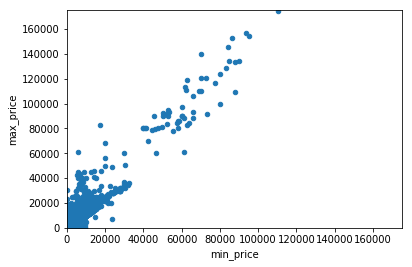

In [30]:
ax = df2.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'max_price')
ax.set_xlim(0, 175000)
ax.set_ylim(0, 175000)

What I observe from the plots is df2's max_price, min_price and modal_price are directly proportional to each other.


(0, 175000)

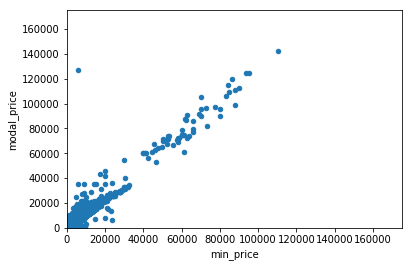

In [31]:
ax = df2.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'modal_price')
ax.set_xlim(0, 175000)
ax.set_ylim(0, 175000)

# We can filter out values equal to zero from df2 manually.

In [32]:
df2 = df2[(df2['min_price'] >= 0) & (df2['max_price'] >= 0) & (df2['modal_price'] >= 0 )]

# Mean Value imputation

In [33]:
df3 = df1.loc[df1['msprice'].isnull(), 'commodity'] #df3 gives the commodities with the missing values
dict = {}
for group, frame in df1[df1['commodity'].isin(df3.tolist())].groupby('commodity'):
    dict[group] = frame['msprice'].mean()
    
dict #Commodities with missing values with their means for the remaining years for mean value imputation.
for key, value in dict.items():
    df1.loc[(df1['commodity'] == key) & (df1['msprice'].isnull()), 'msprice']  = value

# Using Dbscan for outlier detection

In [34]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [35]:
X = df1['msprice'].values.reshape(155, -1)


In [36]:
X.shape

(155, 1)

# As can be seen below dbscan algorithm can be used to remove outliers

# Use one hot encoding then use dbscan algorithm to remove outliers from df1 & df2, df2 will have it hard since , the implementation by scikit-learn is of low quality and thus, we get a memory usage error in this. I'll try and use a different implementation or make my own implementation.

In [37]:
df1.head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


# One-hot encoding for df1

In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df1new = df1.copy()
df1new.loc[:,'year'] = le.fit_transform(df1.loc[:, 'year'])
df1new.loc[:, 'Type'] = le.fit_transform(df1.loc[:, 'Type'])
    
ohe = OneHotEncoder()
X = ohe.fit_transform(df1new[['year', 'Type']]).toarray()
b = df1new['msprice'].values.reshape(-1, 1)
X = np.concatenate((X, b), axis=1)

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [39]:
X.shape # Five columns for year one hot encoded, three columns for the crop type, and one for the price.

(155, 9)

In [40]:
# We must scale and standardize our data
X = StandardScaler().fit_transform(X)
# #############################################################################
# Compute DBSCAN
dbscan = DBSCAN(eps=3, min_samples= 4)
model = dbscan.fit(X)

labels = model.labels_

# identifying the core samples.
core_samples = np.zeros_like(labels, dtype = bool)

core_samples[dbscan.core_sample_indices_] = True
print(core_samples)
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

### This removed the outliers in df1
df1new = df1[core_samples]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False  True False]
Estimated number of clusters: 15
Silhouette Coefficient:

In [41]:
df1.shape ### In total 9 outliers were removed.

(155, 4)

In [42]:
df1new.shape

(146, 4)

In [43]:
(1 - 146/155) * 100 # 5% instances were removed, thus there is no problem in filtering out.

5.8064516129032295

In [44]:
df1 = df1new

Write df1 to file, since it has been outliers removed and imputed!

In [45]:
df1new.to_csv('msp_2012_2016.csv') # Write file to disk

# Time Series Analysis

In [46]:
df2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2015-04,Ahmednagar,bajri,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,bajri,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,wheat(husked),1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
2016-04,Ahmednagar,wheat(husked),387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
2015-04,Ahmednagar,sorgum(jawar),3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


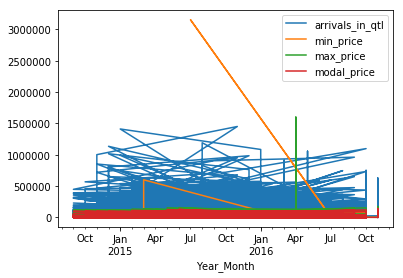

In [47]:
df2.plot() # Just the plot of df2 , nothing can be taken from this , its totally wayward!

In [48]:
len(df2['min_price']) # length 

62429

In [49]:
df1.head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


# Will go for autocorrelation for determining periodicity in the data i.e, repetitions. 

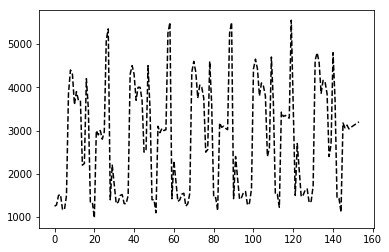

In [50]:
df1['msprice'].plot(style = 'k--') # This graph does seem to be without any trend and with constant mean, constant variance,
#constant autocorrelation, but we can never trust it. Also, df1['msprice] isn't the best thing to look for


#Just trying a new style.

# Autocorrelation Function

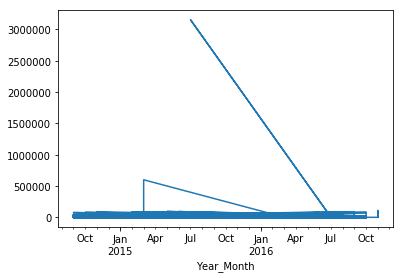

In [51]:
df2['min_price'].plot()

# Log and difference trying to get near stationarity : Something that is constant in time, the mean is constant in time, the variance is constant in time.

In [52]:
"""log_air_passengers = np.log(df2['min_price'])
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.plot()"""

"log_air_passengers = np.log(df2['min_price'])\nlog_air_passengers_diff = log_air_passengers - log_air_passengers.shift()\nlog_air_passengers_diff.plot()"

Differencing can just help detrend and also by taking some moving average and subtract that moving average out.
To remove seasonality use a 'loess' method (locally weighted scatterplot smoothing).
If variance - usually the method is a power transformation or a log transformation.
These are all one to one monotonic transformation and can be reversed.

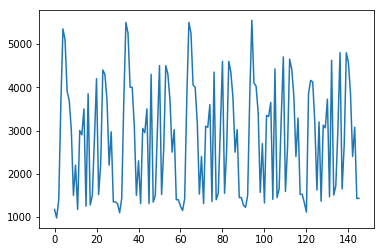

In [53]:
df1.sort_values(['year', 'commodity']).reset_index()['msprice'].plot() # This is the curve I was looking for. If by the looks
# of it its increasing just slightly year on year, thus, looks as if additive seasonality

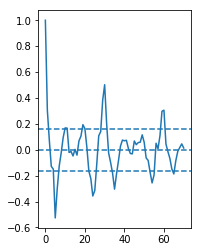

In [54]:
acf_result = stattools.acf(df1.sort_values(['year', 'commodity']).reset_index()['msprice'], nlags=70 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df1['msprice'])), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df1['msprice'])), linestyle = '--')

# In the above plot of autocorrelation, we can see a massive spike at nearly 32, so that gives us internal structure, that the minimum support prices are highly correlated to each other, for each crop.

# High self-correlation at 32, which can be inferred to each crop getting repeated after 32 by year and with its price(since 32 unique values)

In [55]:
df1.head()

,commodity,year,Type,msprice
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0
2,Jowar_Hybrid,2012,Kharif Crops,1500.0
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0
4,BAJRI,2012,Kharif Crops,1175.0


# Performing a dickey fuller test for df1
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary. Thus, we reject the null hypothesis and conclude that df1 is stationary.

In [56]:
stattools.adfuller(df1.sort_values(['year', 'commodity'])['msprice'])

(-6.614935619860212,
 6.2415278596866065e-09,
 12,
 133,
 {'1%': -3.480500383888377,
  '5%': -2.8835279559405045,
  '10%': -2.578495716547007},
 2191.519361071064)

# Sorting index and trying to see correlation for min_price mean values, max_price mean value and modal_price mean value.

In [57]:
df2 = df2.sort_index()

In [58]:
df2.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
Year_Month,,,,,,,,,
2014-09,Kurdwadi,sorgum(jawar),454,1353,2610,1981,2014-09,Solapur,Maharashtra
2014-09,Satara,ladies finger,128,2435,3261,2848,2014-09,Satara,Maharashtra
2014-09,Satara,potato,2988,2175,2488,2331,2014-09,Satara,Maharashtra
2014-09,Satara,ginger (fresh),199,3438,4813,4125,2014-09,Satara,Maharashtra
2014-09,Satara,ground nut pods (dry),1,3000,4000,3500,2014-09,Satara,Maharashtra


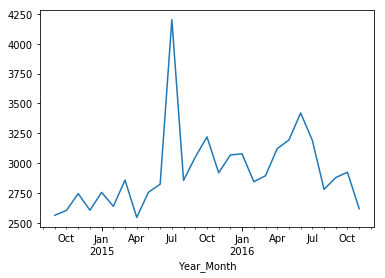

In [59]:
df2['min_price'].groupby(level = 0).mean().plot()

# Looking below it looks like for a lag of 1 there is repetition, since I'm taking all the crops price average values for months. Thus, monthly correlation can be there.

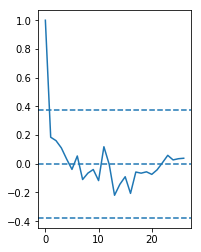

In [60]:
acf_result = stattools.acf(df2['min_price'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df2['min_price'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df2['min_price'].groupby(level = 0).mean())), linestyle = '--')

# Detrending the given data by differencing

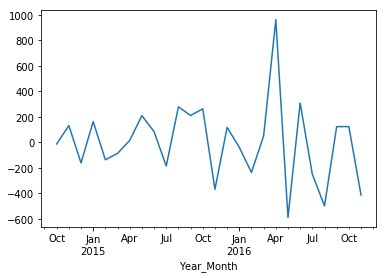

In [61]:
(df2['max_price'].groupby(level = 0).mean() - df2['max_price'].groupby(level = 0).mean().shift()).plot()

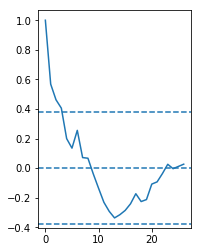

In [62]:
acf_result = stattools.acf(df2['max_price'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df2['max_price'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df2['max_price'].groupby(level = 0).mean())), linestyle = '--')

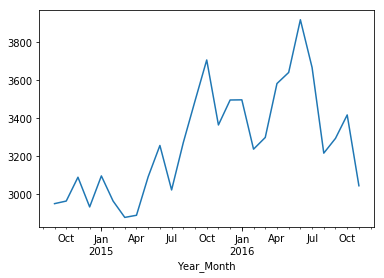

In [63]:
df2['modal_price'].groupby(level = 0).mean().plot()

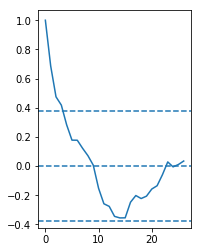

In [64]:
acf_result = stattools.acf(df2['modal_price'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df2['modal_price'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df2['modal_price'].groupby(level = 0).mean())), linestyle = '--')

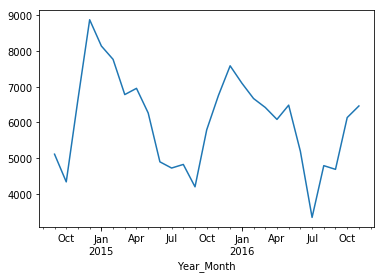

In [65]:
df2['arrivals_in_qtl'].groupby(level = 0).mean().plot()

C:\Users\Sony\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\Sony\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


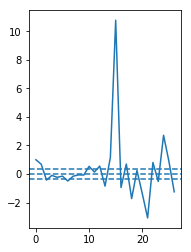

In [66]:
acf_result = stattools.pacf(df2['arrivals_in_qtl'].groupby(level = 0).mean(), nlags=27 )
plt.subplot(121)
plt.plot(acf_result)
plt.axhline(y = 0, linestyle = '--')
plt.axhline(y = -1.96/np.sqrt(len(df2['arrivals_in_qtl'].groupby(level = 0).mean())), linestyle = '--')
plt.axhline(y = 1.96/np.sqrt(len(df2['arrivals_in_qtl'].groupby(level = 0).mean())), linestyle = '--')

# How to remove seasonality/de-seasonalize
Simplest: Average de-trended values for specific season
More Common: use 'loess' method (locally weighted scatterplot smoothing)
Window of specified width is placed over the data
A weighted regression line or curve is fitted to the data, with points closest to the center of the curve having greatest weight.
Weighting is reduced for points further away from regression line/curve and calculation is rerun several times.
This yield one point on loess curve
Helps reduce impact of outlier points.
Computationally taxing

# Detrended max_price

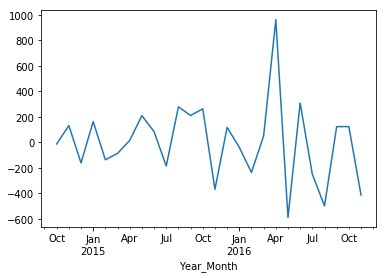

In [67]:
(df2['max_price'].groupby(level = 0).mean() - df2['max_price'].groupby(level = 0).mean().shift()).plot()

# Rolling Windows and Expanding Windows

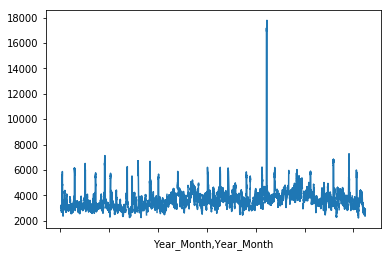

In [68]:
r = df2['max_price'].groupby(level = 0).rolling(window=120)
r.mean().plot()

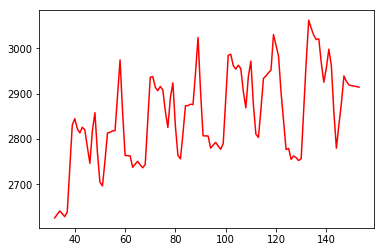

In [69]:
r = df1.rolling(window = 32)
r['msprice'].mean().plot(color='red')

In [70]:
r = df2['max_price'].groupby(level = 0).rolling(window=120).apply(lambda x : x[1] - x[2])

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


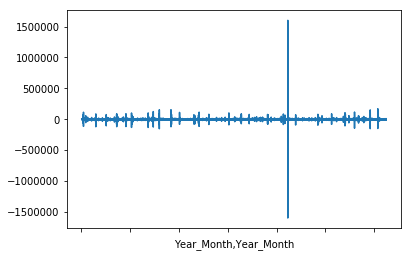

In [71]:
r.plot()

# Just checking expanding windows

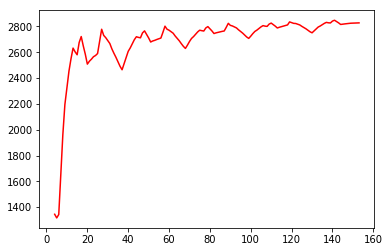

In [72]:
df1.expanding(min_periods= 5)['msprice'].mean().plot(color = 'red')

# Graph for max_price

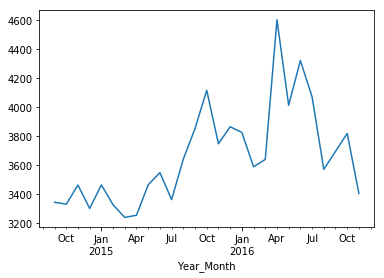

In [73]:
df2['max_price'].groupby(level = 0).mean().plot()

# Close to a linear Trend in max_prices year by year as can be seen below after resampling!!! Resampling removes the fluctuations as seen above.

Year_Month
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, Name: max_price, dtype: object

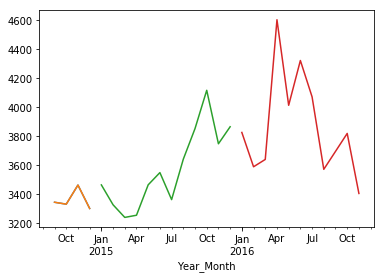

In [74]:
df2['max_price'].groupby(level = 0).mean().resample('A').plot()

# Close to a linear trend for df1 too!

In [75]:
df1 = df1.set_index('year')
df1.index = pd.to_datetime(df1.index, format='%Y').to_period('A')

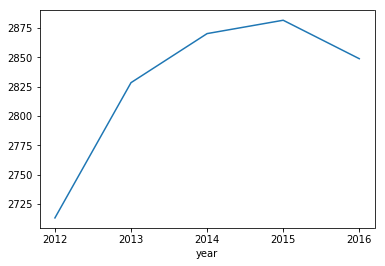

In [76]:
df1.groupby(level= 0)['msprice'].mean().plot()

# Examining the Seasonal Trend in the data

In [77]:
df3 = pd.DataFrame(df2.groupby(level = 0)['max_price'].agg('median'))

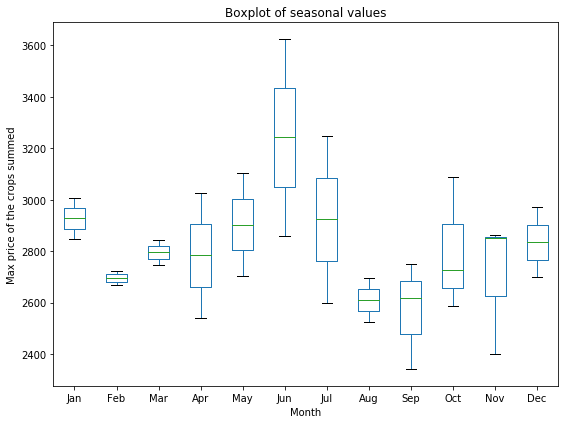

In [78]:
df3['Month'] = df3.index.strftime('%b')
df3['Year'] = df3.index.year

df3_piv = df3.pivot(index= 'Year', columns = 'Month', values = 'max_price')

# put the months in order
month_names = pd.date_range(start='2016-01-01', periods=12, freq='MS').strftime('%b')
df3_piv = df3_piv.reindex(columns=month_names)

# plot it
fig, ax = plt.subplots(figsize=(8, 6))
df3_piv.plot(ax=ax, kind='box');

ax.set_xlabel('Month');
ax.set_ylabel('Max price of the crops summed');
ax.set_title('Boxplot of seasonal values');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [79]:
df3_piv #My pivot table

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617.0,2586.5,2850.0,2700.0
2015,2847.0,2724.0,2748.0,2541.0,2703.0,2859.0,2600.0,2697.5,2750.0,3087.5,2862.0,2970.0
2016,3008.0,2667.0,2842.0,3027.0,3102.0,3625.0,3248.0,2525.5,2341.0,2726.0,2400.0,NaN


In [80]:
df3 = df2.groupby(level = 0)[['max_price', 'min_price', 'modal_price']].agg('mean')
df3.index = df3.index.to_timestamp()

# Trends , Seasonality, Residual and Observed

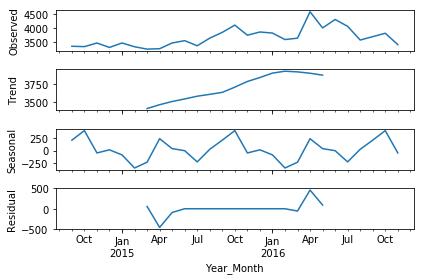

In [81]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df3['max_price'])
resplot = res.plot()

# For max_price

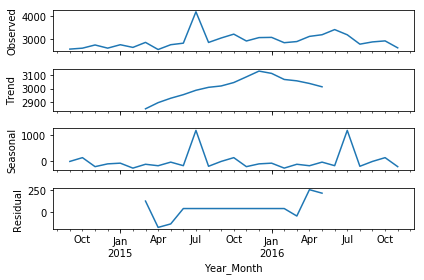

In [82]:
res = sm.tsa.seasonal_decompose(df3['min_price'])
resplot = res.plot()

# For min_price

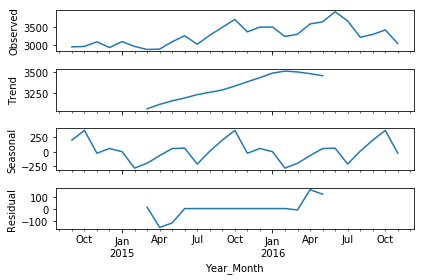

In [83]:
res = sm.tsa.seasonal_decompose(df3['modal_price'])
resplot = res.plot()

# Detect seasonality type (multiplicative or additive) for each cluster of APMC and commodities
Commodities needed to be changed to lower case since there is padded-wheat(unhusked) in capital as well as lower case

In [84]:
df2['Commodity'] = df2['Commodity'].str.lower()

# Below one is for min_price

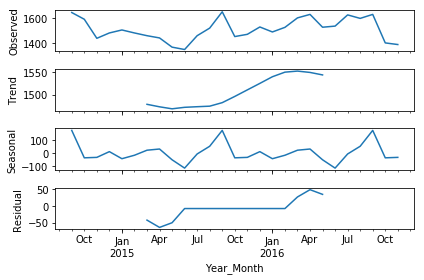

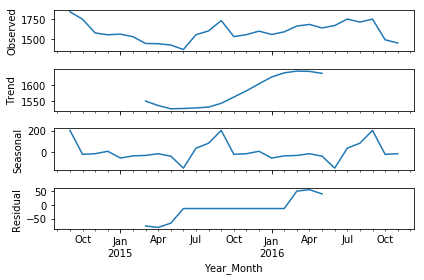

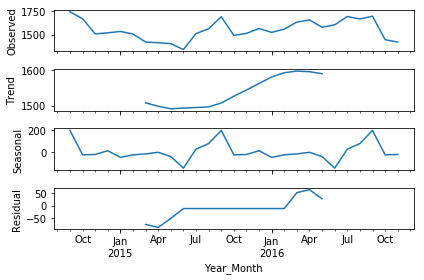

In [86]:
for group, frame in df2.reset_index().groupby('APMC'):
    frame.index = frame['Year_Month']
    frame.index = frame.index.to_timestamp()

    res = sm.tsa.seasonal_decompose(frame.groupby(level = 0)['min_price'].agg('mean'))
    resplot = res.plot()
    res = sm.tsa.seasonal_decompose(frame.groupby(level = 0)['max_price'].agg('mean'))
    resplot = res.plot()
    res = sm.tsa.seasonal_decompose(frame.groupby(level = 0)['modal_price'].agg('mean'))
    resplot = res.plot()
    break

# Check additive/multiplicative nature of all apmc-commodity clusters.

It looks additive to me at first glance.

Compare prices in APMC/Mandi with MSP(Minimum Support Price)- raw and deseasonlized
There maybe a way to do this using time series, but I didn't find any

In [87]:
dict = {}
df1['commodity'] = df1['commodity'].str.lower() # Working with text data, lower() method on str object
for group, frame in df1.groupby('commodity'):
    dict[group] = frame['msprice'].mean()

In [88]:
dict

{'bajri': 1268.0,
 'barli': 1113.75,
 'coconut': 1437.5,
 'copra (ball)_yellow': 5450.0,
 'copra (milling)_yellow': 5287.5,
 'cotton': 3742.0,
 'cotton_long staple': 4042.0,
 'gr.nut kernels': 3970.0,
 'gram_yellow': 3175.0,
 'jowar_hybrid': 1545.0,
 'jute_yellow': 2560.0,
 'maize': 1297.0,
 'masur_yellow': 3062.5,
 'mustard': 3125.0,
 'niger-seed': 3595.0,
 'paddy-unhusked': 1360.0,
 'pigeon pea (tur)': 4310.0,
 'ragi_maldandi': 1585.0,
 'rice(paddy-hus)': 1397.0,
 'safflower': 3037.5,
 'sesamum': 4560.0,
 'sorgum(jawar)': 1566.0,
 'soyabean': 2527.0,
 'soyabean_black': 2400.0,
 'spilt gerrn gram': 4590.0,
 'split black gram': 4390.0,
 'sunflower': 3760.0,
 'toria_yellow': 3075.0,
 'wheat(husked)': 1431.25,
 'wheat(unhusked)': 1431.25}

In [89]:
for group, frame in df2.groupby('APMC'):
    print(frame.loc[frame['Commodity'].isin(list(dict.keys())), ['Commodity','min_price']])
    break

                 Commodity  min_price
Year_Month                           
2014-09     paddy-unhusked       1645
2014-10     paddy-unhusked       1591
2014-11     paddy-unhusked       1438
2014-12     paddy-unhusked       1481
2015-01     paddy-unhusked       1505
2015-02     paddy-unhusked       1481
2015-03     paddy-unhusked       1459
2015-04     paddy-unhusked       1441
2015-05     paddy-unhusked       1367
2015-06     paddy-unhusked       1348
2015-07     paddy-unhusked       1459
2015-08     paddy-unhusked       1520
2015-09     paddy-unhusked       1651
2015-10     paddy-unhusked       1452
2015-11     paddy-unhusked       1470
2015-12     paddy-unhusked       1529
2016-01     paddy-unhusked       1489
2016-02     paddy-unhusked       1526
2016-03     paddy-unhusked       1602
2016-04     paddy-unhusked       1630
2016-05     paddy-unhusked       1527
2016-06     paddy-unhusked       1536
2016-07     paddy-unhusked       1626
2016-08     paddy-unhusked       1598
2016-09     

# Added MSPrice from df1 to df2 for comparison

In [90]:
df2['msp_price'] = df2['Commodity'].apply(lambda x : dict[x] if x in list(dict.keys()) else np.nan)

In [91]:
dict['bajri']

1268.0

In [92]:
if 'bajri' in ['bajri']:
    print('bajri')

bajri


# Graph of msprice ,max_price, min_price and modal_price , here first thing we observe is the spike in and around July in min_price!

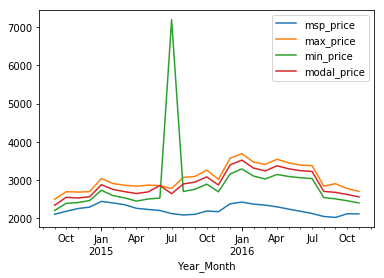

In [93]:
df2.dropna().groupby(level = 0)[[ 'msp_price', 'max_price', 'min_price', 'modal_price']].agg('mean').plot()

If I take an rolling window of 3 months time then I can deseasonlize the max_price, min_price , modal_price by taking the average values and also by removing the trend
Below gives a graph for comparison of msp_price and deseasonalized price for max_price ,etc.
This one is without the shift

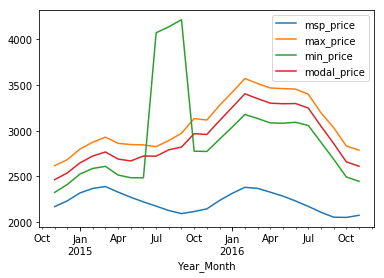

In [94]:
ax = df2.dropna().groupby(level = 0)[[ 'msp_price', 'max_price', 'min_price', 'modal_price']].agg('mean').rolling(window = 3).agg('mean').plot()

# After shifting and differencing , we get the deseasonalized plot

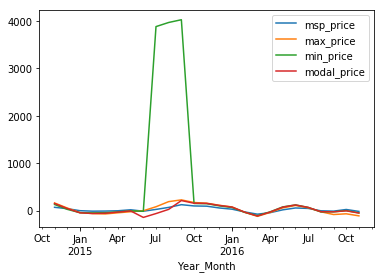

In [95]:
ax = (df2[['max_price', 'min_price', 'modal_price', 'msp_price']] - df2[['max_price', 'min_price', 'modal_price', 'msp_price']].shift()).dropna().groupby(level = 0)[[ 'msp_price', 'max_price', 'min_price', 'modal_price']].agg('mean').rolling(window = 3).agg('mean').plot()

# Flag set of APMC/mandis and commodities with highest price fluctuation across different commodities in each relevant season, and year.

For flagging set of APMC and commodities we can use moving average! Rolling window, which will give the mean for k number of values , where k is the window size. I am selecting window size below 25 percentile, so as to be able to show the fluctuations in even small mandis with lesser crops and months of sale

In [96]:
df2.groupby('APMC')['max_price'].agg(['count', 'mean']).describe() # Will take k - below 36 which is the 25th percentile

,count,mean
count,349.000000,349.000000
mean,178.879656,3827.137521
std,226.546784,2425.335745
min,1.000000,309.132075
25%,36.000000,2815.263158
50%,116.000000,3610.172043
75%,216.000000,4394.803571
max,1538.000000,28704.000000


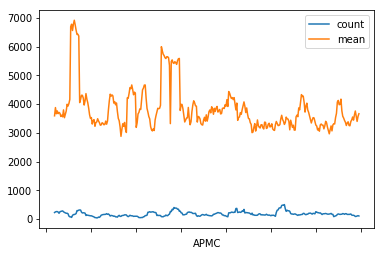

In [97]:
df2.groupby('APMC')['max_price'].agg(['count', 'mean']).rolling(window = 10).agg('mean').plot()

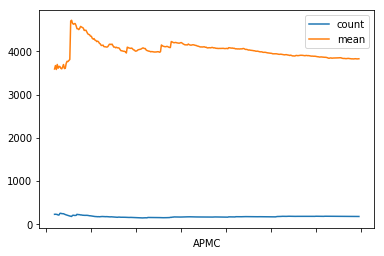

In [98]:
df2.groupby('APMC')['max_price'].agg(['count', 'mean']).expanding(min_periods = 10).agg('mean').plot()

# Expanding window (above) wouldn't be able to detect fluctuations easily after some time since the periods as above would keep on increasing from 10, and any anamolous values wouldn't affect the mean by a very high deviation after a long time

# For commodities : window size of 5, below 25%

In [99]:
df2.groupby('Commodity')['max_price'].agg('count').describe()

count     204.000000
mean      306.024510
std       686.645286
min         1.000000
25%        12.750000
50%        59.500000
75%       248.500000
max      4115.000000
Name: max_price, dtype: float64

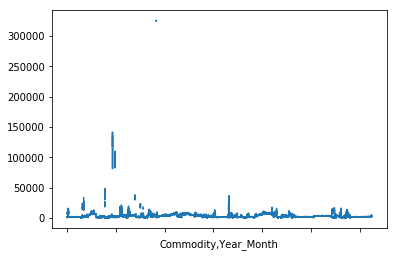

In [100]:
df2.groupby('Commodity')['max_price'].rolling(window = 5).agg('mean').plot()

# The above graph is able to help us in finding fluctuation in prices of commodities.